# BootCamp 2019 - Week 5

## Pandas - 1: Introduction

<img src="Img_panda1.jpg" width="400">

Author: Martina Fraschini

In [1]:
# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Problem 1

In [2]:
s = pd.Series(np.array([(2*n)**2-1 for n in range(26)]), index=[(2*n) for n in range(26)])
s[np.array([i%3==0 for i in s.index])] = 0
s

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64

### Problem 2

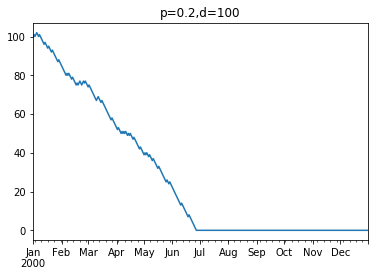

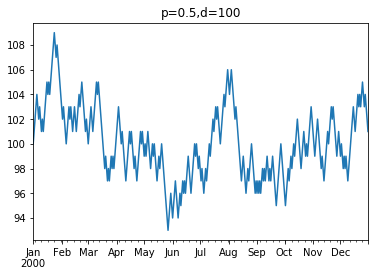

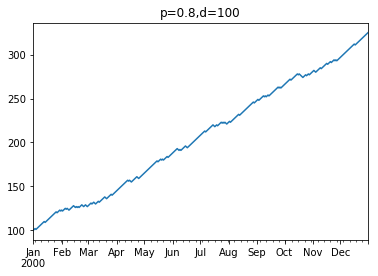

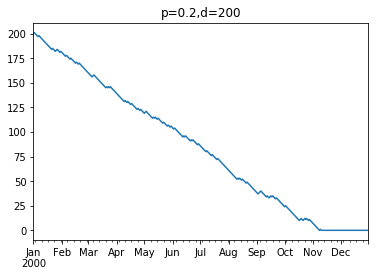

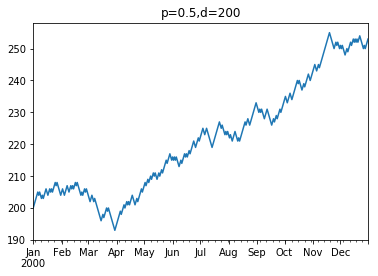

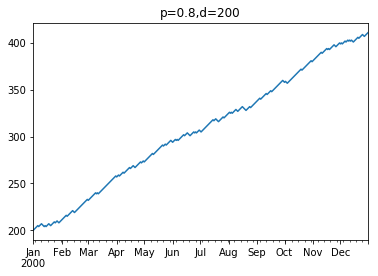

In [3]:
def myfunction(p,d=100):
    myindex = pd.date_range("1/1/2000", "12/31/2000", freq='D')
    # simulate daily change (1 with prob p and -1 with prob (1-p))
    s = pd.Series(np.random.binomial(1,p,len(myindex)), index=myindex)
    s = s.replace(0,-1)
    # start from d and cumultative sum the draws
    s[0] = 0
    s = d + s.cumsum()
    # set any negative values to 0
    s[s < 0] = 0
    # plot the series
    s.plot()
    plt.title(r"p={},d={}".format(p,d))
    plt.show()

myp = [.2, .5, .8]
myd = [100, 200]
for dd in myd:
    for pp in myp:
        myfunction(pp,dd)

### Problem 3

In [4]:
# create DataFrame
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})
studentInfo

,ID,Name,Sex,Age,Class
0,0,Mylan,M,20,Sp
1,1,Regan,F,21,Se
2,2,Justin,M,18,Fr
3,3,Jess,F,22,Se
4,4,Jason,M,19,Sp
5,5,Remi,F,20,J
6,6,Matt,M,20,J
7,7,Alexander,M,19,J
8,8,JeanMarie,F,20,Se


In [5]:
studentInfo[(studentInfo['Age'] > 19) & (studentInfo['Sex'] == 'M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


### Problem 4

In [6]:
pd.merge(studentInfo[studentInfo['Sex']=='M'], otherInfo, on='ID', how='inner')[['ID', 'Age', 'GPA', 'Sex']]

,ID,Age,GPA,Sex
0,0,20,3.8,M
1,2,18,3.0,M
2,4,19,2.8,M
3,6,20,3.8,M
4,7,19,3.4,M
